# Regression Model for Bike Sharing Using Python - Take 2
### David Lowe
### June 8, 2018

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery (http://machinelearningmastery.com/)

Dataset Used: Bike Sharing Dataset

Dataset ML Model: Regression with numerical attributes

Dataset Reference: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

For performance benchmarks, please consult: https://www.kaggle.com/contactprad/bike-share-daily-data

INTRODUCTION: Using the data generated by a bike sharing system, this project attempts to predict the daily demand for bike sharing. For this iteration (Take No.2) of the project, we attempt to use the data available, apply the one-hot-encoding transformation on each categorical attribute, and apply the Stochastic Gradient Boosting algorithm to examine the modeling effectiveness. Again, the goal of this iteration is to examine various data transformation options and find a sufficiently accurate (low error) combination for future prediction tasks.

This iteration of the project will test the following six modeling scenarios:

* Scenario No.1: Perform one-hot-encoding on the categorical variable “mnth” and observe the change in regression accuracy.
* Scenario No.2: Perform one-hot-encoding on the categorical variable “holiday” and observe the change in regression accuracy.
* Scenario No.3: Perform one-hot-encoding on the categorical variable “weekday” and observe the change in regression accuracy.
* Scenario No.4: Perform one-hot-encoding on the categorical variable “workingday” and observe the change in regression accuracy.
* Scenario No.5: Perform one-hot-encoding on the categorical variable "weathersit” and observe the change in regression accuracy.
* Scenario No.6: Perform one-hot-encoding on the all categorical variables and observe the change in regression accuracy.

For all scenarios, steps from sections No.3 and No.4 will be repeated for each scenario.

CONCLUSION: The baseline performance of the Stochastic Gradient Boosting stands at an RMSE value of 1255 using the training data. The various scenarios achieved an average RMSE value of between 1243 and 1261. For this iteration of the project, the one-hot-encoding transformation apparently did not improve the model performance with a noticeable difference.

The purpose of this project is to analyze predictions using various machine learning algorithms and to document the steps using a template. Working through machine learning problems from end-to-end requires a structured modeling approach. Working problems through a project template can also encourage us to think about the problem more critically, to challenge our assumptions, and to get proficient at all parts of a modeling project.

The project aims to touch on the following areas:

* Document a predictive modeling problem end-to-end.
* Explore data cleaning and transformation options
* Explore non-ensemble and ensemble algorithms for baseline model performance
* Explore algorithm tuning techniques for improving model performance

Any predictive modeling machine learning project genrally can be broken down into about six major tasks:

1. Prepare Problem
2. Summarize Data
3. Prepare Data
4. Model and Evaluate Algorithms
5. Improve Accuracy or Results
6. Finalize Model and Present Results

## Section 1 - Prepare Problem

### 1.a) Load ibraries

In [117]:
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas import get_dummies
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

### 1.b) Load dataset

In [118]:
startTimeScript = datetime.now()

inputFile = 'bike-sharing-day.csv'
entireDataset = read_csv(inputFile)
entireDataset = entireDataset.rename(columns={'cnt': 'targetVar'})

# We are making some preliminary assumptions to drop certain attributes right from the beginning.
# Assumption #1: Drop the "instant" column since it is just an unique row identifier.
# Assumption #2: Drop the "detday" column since it is just an unique date field.
# Assumption #3: Drop the "yr" column since it was just an date representation and a one-time occurance.
# Assumption #4: Drop the "casual" and "registered" columns since they are just derived number from the target variable and directly correlate with it.
entireDataset.drop('instant', axis=1, inplace=True)
entireDataset.drop('dteday', axis=1, inplace=True)
entireDataset.drop('yr', axis=1, inplace=True)
entireDataset.drop('casual', axis=1, inplace=True)
entireDataset.drop('registered', axis=1, inplace=True)

## Section 2 - Summarize Data
To gain a better understanding of the data that we have on-hand, we will leverage a number of descriptive statistics and data visualization techniques. The plan is to use the results to consider new questions, review assumptions, and validate hypotheses that we can investigate later with specialized models.

### 2.a) Descriptive statistics

In [119]:
# Set up a variable for the total number of attribute columns (totAttr)
totCol = len(entireDataset.columns)
totAttr = totCol-1
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 4
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1

#### 2.a.i) Peek at the data itself.

In [120]:
print(entireDataset.head(20))

    season  mnth  holiday  weekday  workingday  weathersit      temp  \
0        1     1        0        6           0           2  0.344167   
1        1     1        0        0           0           2  0.363478   
2        1     1        0        1           1           1  0.196364   
3        1     1        0        2           1           1  0.200000   
4        1     1        0        3           1           1  0.226957   
5        1     1        0        4           1           1  0.204348   
6        1     1        0        5           1           2  0.196522   
7        1     1        0        6           0           2  0.165000   
8        1     1        0        0           0           1  0.138333   
9        1     1        0        1           1           1  0.150833   
10       1     1        0        2           1           2  0.169091   
11       1     1        0        3           1           1  0.172727   
12       1     1        0        4           1           1  0.16

#### 2.a.ii) Dimensions of the dataset.

In [121]:
print(entireDataset.shape)

(731, 11)


#### 2.a.iii) Types of the attributes.

In [122]:
print(entireDataset.dtypes)

season          int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
targetVar       int64
dtype: object


#### 2.a.iv) Statistical summary of all attributes.

In [123]:
print(entireDataset.describe())

           season        mnth     holiday     weekday  workingday  weathersit  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    6.519836    0.028728    2.997264    0.683995    1.395349   
std      1.110807    3.451913    0.167155    2.004787    0.465233    0.544894   
min      1.000000    1.000000    0.000000    0.000000    0.000000    1.000000   
25%      2.000000    4.000000    0.000000    1.000000    0.000000    1.000000   
50%      3.000000    7.000000    0.000000    3.000000    1.000000    1.000000   
75%      3.000000   10.000000    0.000000    5.000000    1.000000    2.000000   
max      4.000000   12.000000    1.000000    6.000000    1.000000    3.000000   

             temp       atemp         hum   windspeed    targetVar  
count  731.000000  731.000000  731.000000  731.000000   731.000000  
mean     0.495385    0.474354    0.627894    0.190486  4504.348837  
std      0.183051    0.162961    0.142429    0.077498  1937.211

#### 2.a.v) Summarize the levels of the class attribute.

In [124]:
# Not applicable for this iteration of the project.
# print(entireDataset.groupby('targetVar').size())

#### 2.a.v) Count missing values.

In [125]:
print(entireDataset.isnull().sum())

season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
targetVar     0
dtype: int64


### 2.b) Data visualizations

##### 2.b.i) Univariate plots to better understand each attribute

In [126]:
attributeOnly = entireDataset.drop(columns=['targetVar'])

In [127]:
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

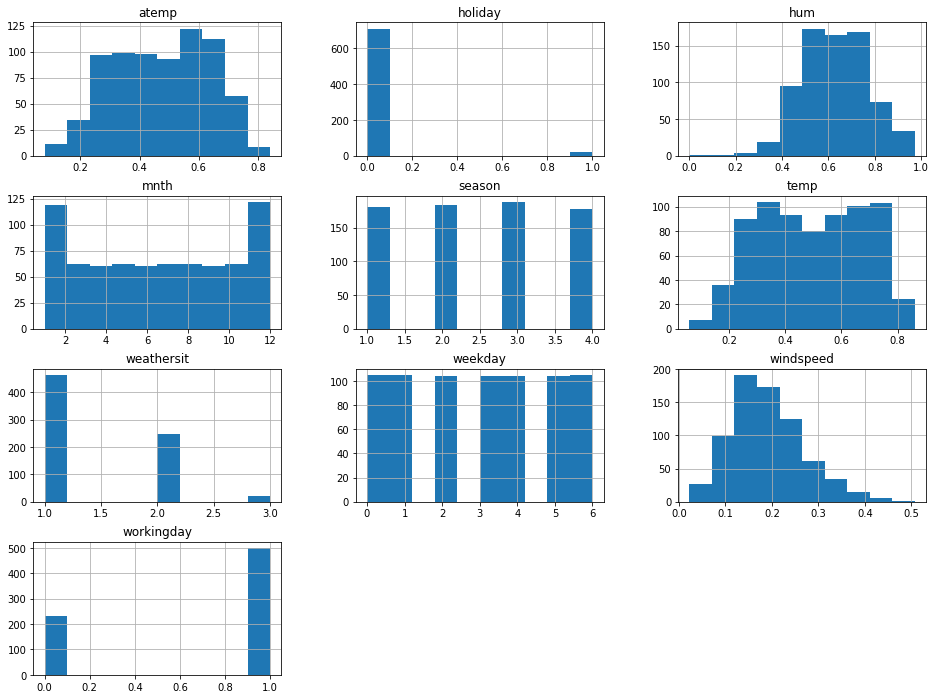

In [128]:
# Histograms for each attribute
attributeOnly.hist()
pyplot.show()

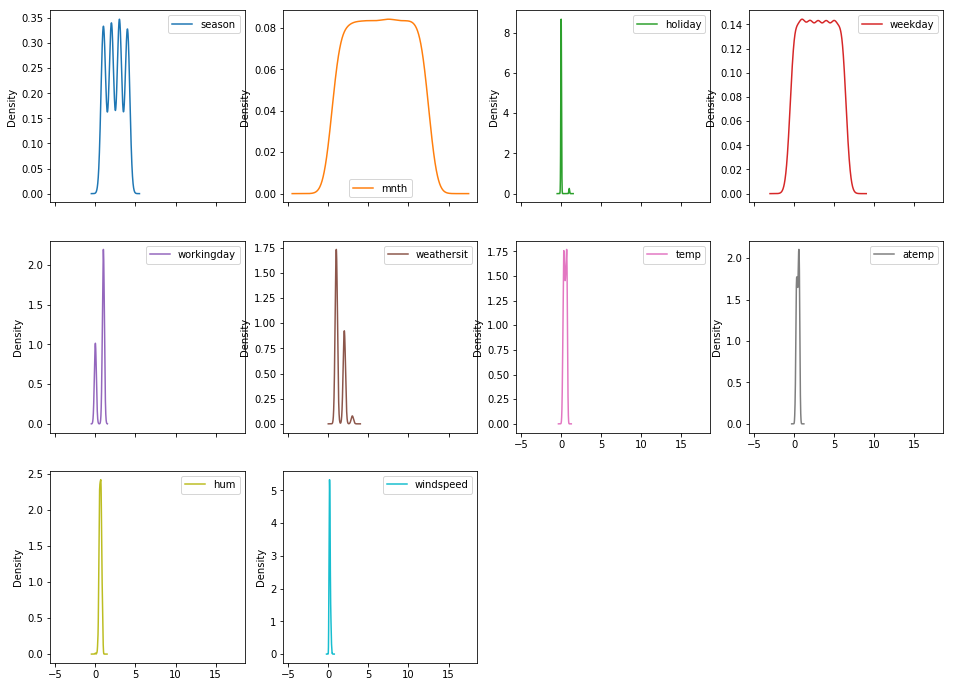

In [129]:
# Density plot for each attribute
attributeOnly.plot(kind='density', subplots=True, layout=(dispRow,dispCol))
pyplot.show()

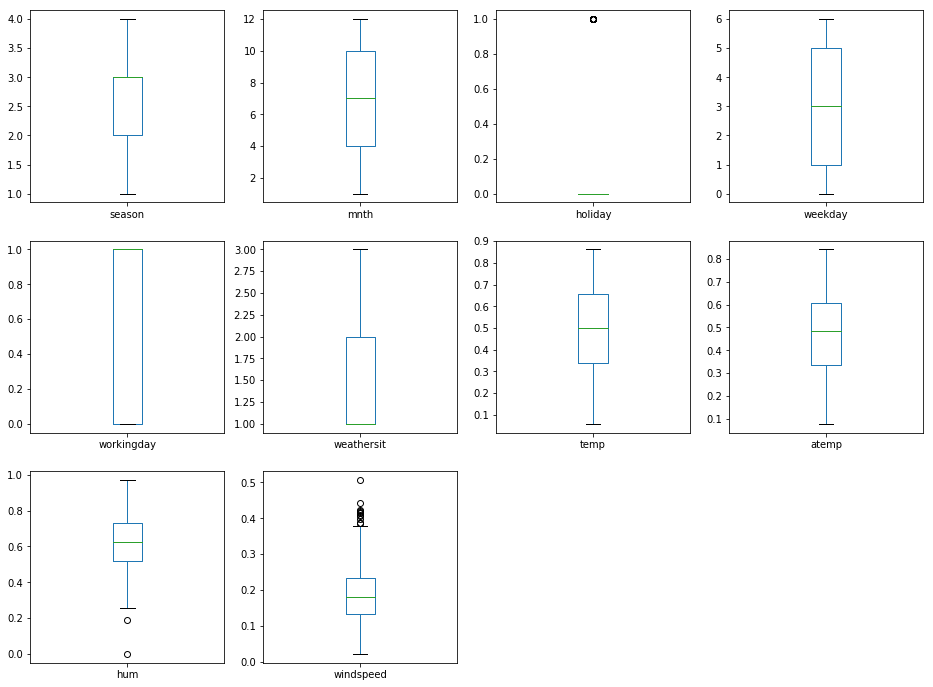

In [130]:
# Box and Whisker plot for each attribute
attributeOnly.plot(kind='box', subplots=True, layout=(dispRow,dispCol))
pyplot.show()

#### 2.b.ii) Multivariate plots to better understand the relationships between attributes

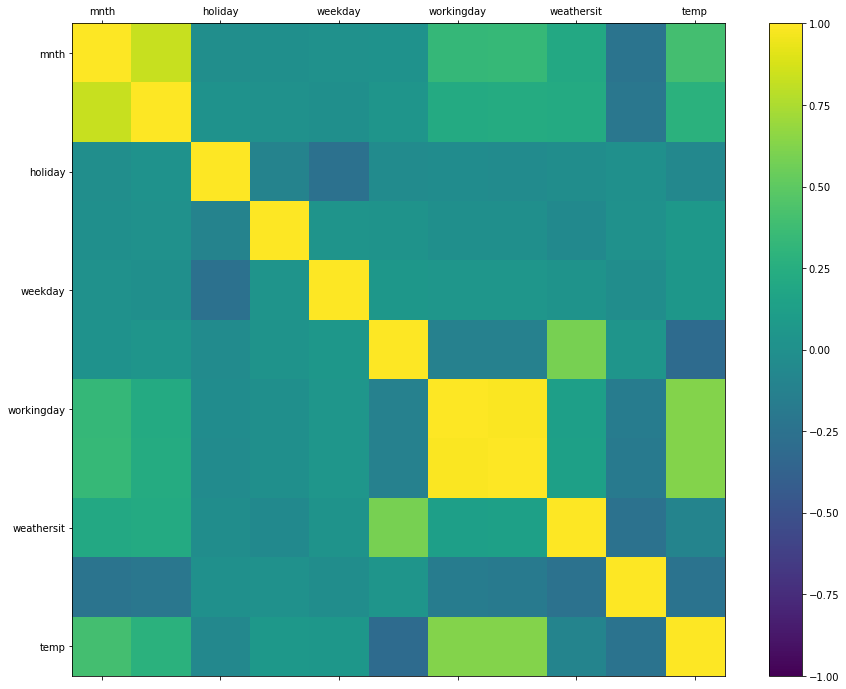

In [131]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(entireDataset.corr(), vmin=-1, vmax=1)
col_labels=['season','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','targetVar']
ax.set_xticklabels(col_labels)
ax.set_yticklabels(col_labels)
fig.colorbar(cax)
pyplot.show()

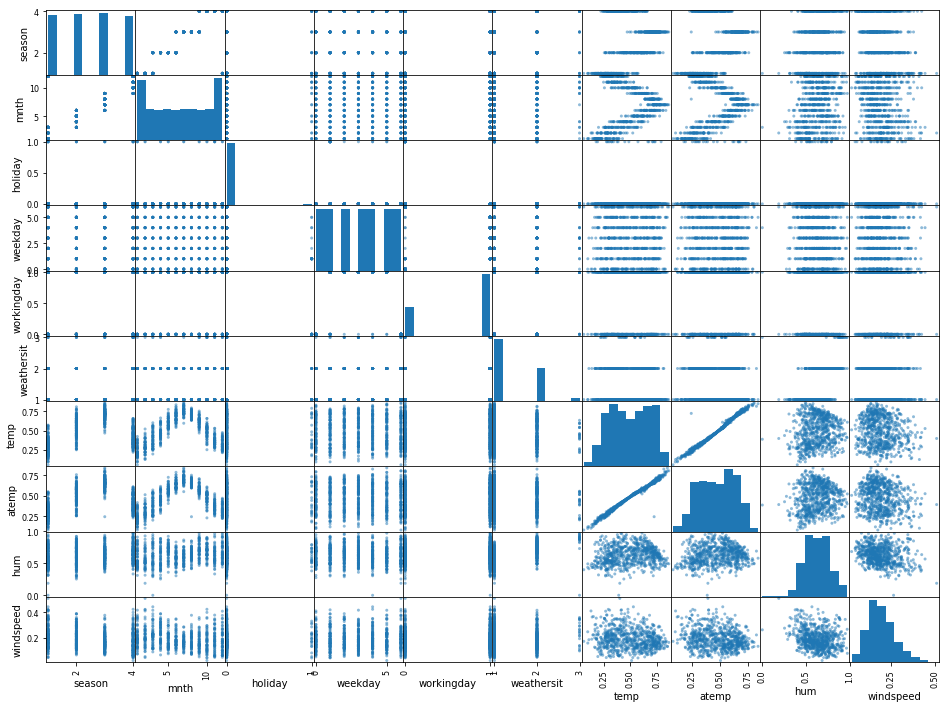

In [132]:
# Scatterplot matrix
scatter_matrix(attributeOnly)
pyplot.show()

## Section 3 - Prepare Data
Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

* Cleaning data by removing duplicates, marking missing values and even imputing missing values.
* Feature selection where redundant features may be removed.
* Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

### 3.a) Data Cleaning

In [133]:
# Not applicable for this iteration of the project.

### 3.b) Feature Selection

In [134]:
# Eliminate additional co-related columns
# Eliminate the column "season" since it is highly co-related with "mnth"
# Eliminate the column "atemp" since it is highly co-related with "temp"
entireDataset.drop('season', axis=1, inplace=True)
entireDataset.drop('atemp', axis=1, inplace=True)

# Keep a copy of the original dataset to iterate through each scenario
savedDataset = entireDataset.copy()
results = []
names = []

## Scenario Baseline begins

### 3.c) Data Transforms

In [135]:
# Conver the string variables to categorical variables as appropriate
entireDataset = savedDataset.copy()
totCol = len(entireDataset.columns)
totAttr = totCol-1
print(entireDataset.dtypes)

mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
targetVar       int64
dtype: object


### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [136]:
seedNum = 888
array = entireDataset.values
X_entire = array[:,0:totAttr]
Y_entire = array[:,totAttr]
validation_size = 0.25
X_train, X_validation, Y_train, Y_validation = train_test_split(X_entire, Y_entire, test_size=validation_size, random_state=seedNum)
print("X_entire.shape: {} Y_entire.shape: {}".format(X_entire.shape, Y_entire.shape))
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

X_entire.shape: (731, 8) Y_entire.shape: (731,)
X_train.shape: (548, 8) Y_train.shape: (548,)
X_validation.shape: (183, 8) Y_validation.shape: (183,)
Total time for data handling and visualization: 0:00:08.673489


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

### 4.a) Set test options and evaluation metric

In [137]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'neg_mean_squared_error'

In [138]:
# Generate model for the scenario
name = 'Baseline'
model = GradientBoostingRegressor()
startTimeModule = datetime.now()
kfold = KFold(n_splits=num_folds, random_state=seedNum)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)
print ('Model training time:',(datetime.now() - startTimeModule))

Baseline: -1574881.562999 (287809.762036)
Model training time: 0:00:00.407844


## Scenario Baseline ends

## Scenario No.1 begins

### 3.c) Data Transforms

In [139]:
# Conver the string variables to categorical variables as appropriate
entireDataset = savedDataset.copy()
entireDataset["mnth"] = entireDataset["mnth"].astype('category')
print(entireDataset.dtypes)

mnth          category
holiday          int64
weekday          int64
workingday       int64
weathersit       int64
temp           float64
hum            float64
windspeed      float64
targetVar        int64
dtype: object


In [140]:
# Apply the One-Hot-Encoding (Dummy Variables) technique and re-arrange columns in dataframe
entireDataset_dummies = get_dummies(entireDataset)
entireDataset_target = entireDataset_dummies.pop('targetVar')
entireDataset_dummies['targetVar'] = entireDataset_target
totCol = len(entireDataset_dummies.columns)
totAttr = totCol-1
print(entireDataset_dummies.dtypes)

holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
mnth_1          uint8
mnth_2          uint8
mnth_3          uint8
mnth_4          uint8
mnth_5          uint8
mnth_6          uint8
mnth_7          uint8
mnth_8          uint8
mnth_9          uint8
mnth_10         uint8
mnth_11         uint8
mnth_12         uint8
targetVar       int64
dtype: object


### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [141]:
seedNum = 888
array = entireDataset_dummies.values
X_entire = array[:,0:totAttr]
Y_entire = array[:,totAttr]
validation_size = 0.25
X_train, X_validation, Y_train, Y_validation = train_test_split(X_entire, Y_entire, test_size=validation_size, random_state=seedNum)
print("X_entire.shape: {} Y_entire.shape: {}".format(X_entire.shape, Y_entire.shape))
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

X_entire.shape: (731, 19) Y_entire.shape: (731,)
X_train.shape: (548, 19) Y_train.shape: (548,)
X_validation.shape: (183, 19) Y_validation.shape: (183,)
Total time for data handling and visualization: 0:00:09.153061


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

### 4.a) Set test options and evaluation metric

In [142]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'neg_mean_squared_error'

In [143]:
# Generate model for the scenario
name = 'Scenario1'
model = GradientBoostingRegressor()
startTimeModule = datetime.now()
kfold = KFold(n_splits=num_folds, random_state=seedNum)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)
print ('Model training time:',(datetime.now() - startTimeModule))

Scenario1: -1540990.604824 (223380.983814)
Model training time: 0:00:00.452351


## Scenario No.1 ends

## Scenario No.2 begins

### 3.c) Data Transforms

In [144]:
# Conver the string variables to categorical variables as appropriate
entireDataset = savedDataset.copy()
entireDataset["holiday"] = entireDataset["holiday"].astype('category')
print(entireDataset.dtypes)

mnth             int64
holiday       category
weekday          int64
workingday       int64
weathersit       int64
temp           float64
hum            float64
windspeed      float64
targetVar        int64
dtype: object


In [145]:
# Apply the One-Hot-Encoding (Dummy Variables) technique and re-arrange columns in dataframe
entireDataset_dummies = get_dummies(entireDataset)
entireDataset_target = entireDataset_dummies.pop('targetVar')
entireDataset_dummies['targetVar'] = entireDataset_target
totCol = len(entireDataset_dummies.columns)
totAttr = totCol-1
print(entireDataset_dummies.dtypes)

mnth            int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
holiday_0       uint8
holiday_1       uint8
targetVar       int64
dtype: object


### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [146]:
seedNum = 888
array = entireDataset_dummies.values
X_entire = array[:,0:totAttr]
Y_entire = array[:,totAttr]
validation_size = 0.25
X_train, X_validation, Y_train, Y_validation = train_test_split(X_entire, Y_entire, test_size=validation_size, random_state=seedNum)
print("X_entire.shape: {} Y_entire.shape: {}".format(X_entire.shape, Y_entire.shape))
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

X_entire.shape: (731, 9) Y_entire.shape: (731,)
X_train.shape: (548, 9) Y_train.shape: (548,)
X_validation.shape: (183, 9) Y_validation.shape: (183,)
Total time for data handling and visualization: 0:00:09.685577


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

### 4.a) Set test options and evaluation metric

In [147]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'neg_mean_squared_error'

In [148]:
# Generate model for the scenario
name = 'Scenario2'
model = GradientBoostingRegressor()
startTimeModule = datetime.now()
kfold = KFold(n_splits=num_folds, random_state=seedNum)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)
print ('Model training time:',(datetime.now() - startTimeModule))

Scenario2: -1572106.752766 (287248.476432)
Model training time: 0:00:00.407374


## Scenario No.2 ends

## Scenario No.3 begins

### 3.c) Data Transforms

In [149]:
# Conver the string variables to categorical variables as appropriate
entireDataset = savedDataset.copy()
entireDataset["weekday"] = entireDataset["weekday"].astype('category')
print(entireDataset.dtypes)

mnth             int64
holiday          int64
weekday       category
workingday       int64
weathersit       int64
temp           float64
hum            float64
windspeed      float64
targetVar        int64
dtype: object


In [150]:
# Apply the One-Hot-Encoding (Dummy Variables) technique and re-arrange columns in dataframe
entireDataset_dummies = get_dummies(entireDataset)
entireDataset_target = entireDataset_dummies.pop('targetVar')
entireDataset_dummies['targetVar'] = entireDataset_target
totCol = len(entireDataset_dummies.columns)
totAttr = totCol-1
print(entireDataset_dummies.dtypes)

mnth            int64
holiday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
weekday_0       uint8
weekday_1       uint8
weekday_2       uint8
weekday_3       uint8
weekday_4       uint8
weekday_5       uint8
weekday_6       uint8
targetVar       int64
dtype: object


### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [151]:
seedNum = 888
array = entireDataset_dummies.values
X_entire = array[:,0:totAttr]
Y_entire = array[:,totAttr]
validation_size = 0.25
X_train, X_validation, Y_train, Y_validation = train_test_split(X_entire, Y_entire, test_size=validation_size, random_state=seedNum)
print("X_entire.shape: {} Y_entire.shape: {}".format(X_entire.shape, Y_entire.shape))
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

X_entire.shape: (731, 14) Y_entire.shape: (731,)
X_train.shape: (548, 14) Y_train.shape: (548,)
X_validation.shape: (183, 14) Y_validation.shape: (183,)
Total time for data handling and visualization: 0:00:10.174146


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

### 4.a) Set test options and evaluation metric

In [152]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'neg_mean_squared_error'

In [153]:
# Generate model for the scenario
name = 'Scenario3'
model = GradientBoostingRegressor()
startTimeModule = datetime.now()
kfold = KFold(n_splits=num_folds, random_state=seedNum)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)
print ('Model training time:',(datetime.now() - startTimeModule))

Scenario3: -1594597.089802 (248336.199682)
Model training time: 0:00:00.412557


## Scenario No.3 ends

## Scenario No.4 begins

### 3.c) Data Transforms

In [154]:
# Conver the string variables to categorical variables as appropriate
entireDataset = savedDataset.copy()
entireDataset["workingday"] = entireDataset["workingday"].astype('category')
print(entireDataset.dtypes)

mnth             int64
holiday          int64
weekday          int64
workingday    category
weathersit       int64
temp           float64
hum            float64
windspeed      float64
targetVar        int64
dtype: object


In [155]:
# Apply the One-Hot-Encoding (Dummy Variables) technique and re-arrange columns in dataframe
entireDataset_dummies = get_dummies(entireDataset)
entireDataset_target = entireDataset_dummies.pop('targetVar')
entireDataset_dummies['targetVar'] = entireDataset_target
totCol = len(entireDataset_dummies.columns)
totAttr = totCol-1
print(entireDataset_dummies.dtypes)

mnth              int64
holiday           int64
weekday           int64
weathersit        int64
temp            float64
hum             float64
windspeed       float64
workingday_0      uint8
workingday_1      uint8
targetVar         int64
dtype: object


### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [156]:
seedNum = 888
array = entireDataset_dummies.values
X_entire = array[:,0:totAttr]
Y_entire = array[:,totAttr]
validation_size = 0.25
X_train, X_validation, Y_train, Y_validation = train_test_split(X_entire, Y_entire, test_size=validation_size, random_state=seedNum)
print("X_entire.shape: {} Y_entire.shape: {}".format(X_entire.shape, Y_entire.shape))
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

X_entire.shape: (731, 9) Y_entire.shape: (731,)
X_train.shape: (548, 9) Y_train.shape: (548,)
X_validation.shape: (183, 9) Y_validation.shape: (183,)
Total time for data handling and visualization: 0:00:10.669165


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

### 4.a) Set test options and evaluation metric

In [157]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'neg_mean_squared_error'

In [158]:
# Generate model for the scenario
name = 'Scenario4'
model = GradientBoostingRegressor()
startTimeModule = datetime.now()
kfold = KFold(n_splits=num_folds, random_state=seedNum)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)
print ('Model training time:',(datetime.now() - startTimeModule))

Scenario4: -1576321.918202 (285850.414084)
Model training time: 0:00:00.356354


## Scenario No.4 ends

## Scenario No.5 begins

### 3.c) Data Transforms

In [159]:
# Conver the string variables to categorical variables as appropriate
entireDataset = savedDataset.copy()
entireDataset["weathersit"] = entireDataset["weathersit"].astype('category')
print(entireDataset.dtypes)

mnth             int64
holiday          int64
weekday          int64
workingday       int64
weathersit    category
temp           float64
hum            float64
windspeed      float64
targetVar        int64
dtype: object


In [160]:
# Apply the One-Hot-Encoding (Dummy Variables) technique and re-arrange columns in dataframe
entireDataset_dummies = get_dummies(entireDataset)
entireDataset_target = entireDataset_dummies.pop('targetVar')
entireDataset_dummies['targetVar'] = entireDataset_target
totCol = len(entireDataset_dummies.columns)
totAttr = totCol-1
print(entireDataset_dummies.dtypes)

mnth              int64
holiday           int64
weekday           int64
workingday        int64
temp            float64
hum             float64
windspeed       float64
weathersit_1      uint8
weathersit_2      uint8
weathersit_3      uint8
targetVar         int64
dtype: object


### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [161]:
seedNum = 888
array = entireDataset_dummies.values
X_entire = array[:,0:totAttr]
Y_entire = array[:,totAttr]
validation_size = 0.25
X_train, X_validation, Y_train, Y_validation = train_test_split(X_entire, Y_entire, test_size=validation_size, random_state=seedNum)
print("X_entire.shape: {} Y_entire.shape: {}".format(X_entire.shape, Y_entire.shape))
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

X_entire.shape: (731, 10) Y_entire.shape: (731,)
X_train.shape: (548, 10) Y_train.shape: (548,)
X_validation.shape: (183, 10) Y_validation.shape: (183,)
Total time for data handling and visualization: 0:00:11.108687


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

### 4.a) Set test options and evaluation metric

In [162]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'neg_mean_squared_error'

In [163]:
# Generate model for the scenario
name = 'Scenario5'
model = GradientBoostingRegressor()
startTimeModule = datetime.now()
kfold = KFold(n_splits=num_folds, random_state=seedNum)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)
print ('Model training time:',(datetime.now() - startTimeModule))

Scenario5: -1578607.690643 (288877.059138)
Model training time: 0:00:00.399224


## Scenario No.5 ends

## Scenario No.6 begins

### 3.c) Data Transforms

In [164]:
# Conver the string variables to categorical variables as appropriate
entireDataset = savedDataset.copy()
entireDataset["mnth"] = entireDataset["mnth"].astype('category')
entireDataset["holiday"] = entireDataset["holiday"].astype('category')
entireDataset["weekday"] = entireDataset["weekday"].astype('category')
entireDataset["workingday"] = entireDataset["workingday"].astype('category')
entireDataset["weathersit"] = entireDataset["weathersit"].astype('category')
print(entireDataset.dtypes)

mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
hum            float64
windspeed      float64
targetVar        int64
dtype: object


In [165]:
# Apply the One-Hot-Encoding (Dummy Variables) technique and re-arrange columns in dataframe
entireDataset_dummies = get_dummies(entireDataset)
entireDataset_target = entireDataset_dummies.pop('targetVar')
entireDataset_dummies['targetVar'] = entireDataset_target
totCol = len(entireDataset_dummies.columns)
totAttr = totCol-1
print(entireDataset_dummies.dtypes)

temp            float64
hum             float64
windspeed       float64
mnth_1            uint8
mnth_2            uint8
mnth_3            uint8
mnth_4            uint8
mnth_5            uint8
mnth_6            uint8
mnth_7            uint8
mnth_8            uint8
mnth_9            uint8
mnth_10           uint8
mnth_11           uint8
mnth_12           uint8
holiday_0         uint8
holiday_1         uint8
weekday_0         uint8
weekday_1         uint8
weekday_2         uint8
weekday_3         uint8
weekday_4         uint8
weekday_5         uint8
weekday_6         uint8
workingday_0      uint8
workingday_1      uint8
weathersit_1      uint8
weathersit_2      uint8
weathersit_3      uint8
targetVar         int64
dtype: object


### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [166]:
seedNum = 888
array = entireDataset_dummies.values
X_entire = array[:,0:totAttr]
Y_entire = array[:,totAttr]
validation_size = 0.25
X_train, X_validation, Y_train, Y_validation = train_test_split(X_entire, Y_entire, test_size=validation_size, random_state=seedNum)
print("X_entire.shape: {} Y_entire.shape: {}".format(X_entire.shape, Y_entire.shape))
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

X_entire.shape: (731, 29) Y_entire.shape: (731,)
X_train.shape: (548, 29) Y_train.shape: (548,)
X_validation.shape: (183, 29) Y_validation.shape: (183,)
Total time for data handling and visualization: 0:00:11.592021


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

### 4.a) Set test options and evaluation metric

In [167]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'neg_mean_squared_error'

In [168]:
# Generate model for the scenario
name = 'Scenario6'
model = GradientBoostingRegressor()
startTimeModule = datetime.now()
kfold = KFold(n_splits=num_folds, random_state=seedNum)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)
print ('Model training time:',(datetime.now() - startTimeModule))

Scenario6: -1575437.333591 (263541.908137)
Model training time: 0:00:00.560034


## Scenario No.6 ends

### 4.b) Spot-checking baseline algorithms

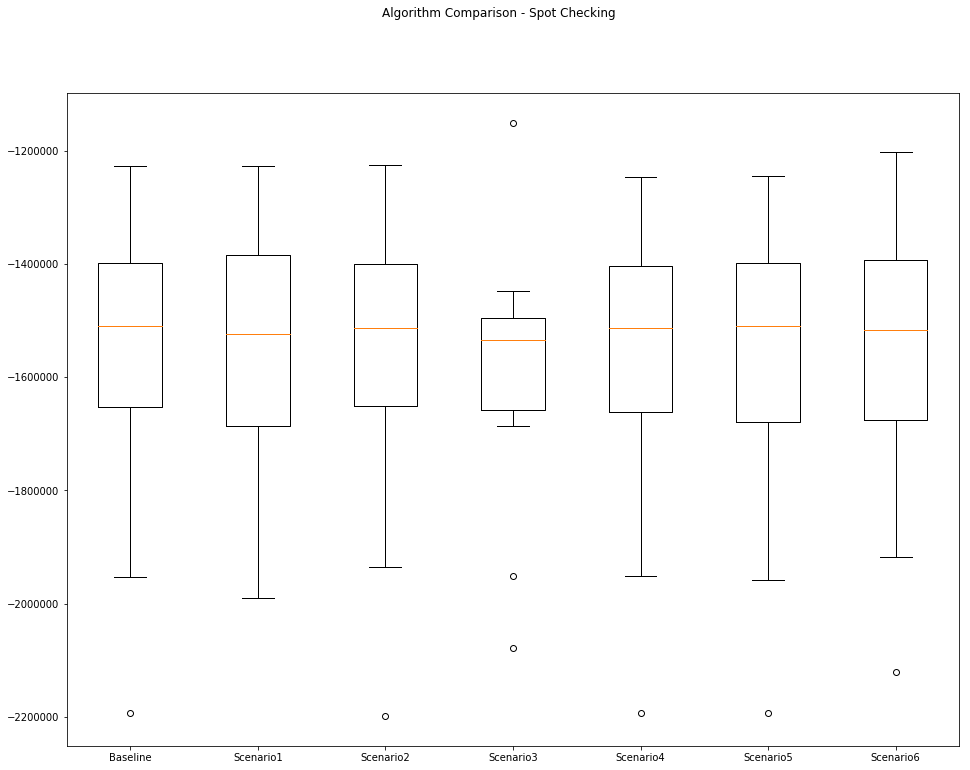

In [169]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 5 - Improve Accuracy
After we achieve a short list of machine learning algorithms with good level of accuracy, we can leverage ways to improve the accuracy of the models.

### 5.a) Algorithm Tuning

In [170]:
# Not applicable for this iteration of the project.

### 5.b) Compare Algorithms After Tuning

In [171]:
# Not applicable for this iteration of the project.

## Section 6 - Finalize Model
Once we have narrow down to a model that we believe can make accurate predictions on unseen data, we are ready to finalize it. Finalizing a model may involve sub-tasks such as:
* Using an optimal model tuned to make predictions on unseen data.
* Creating a standalone model using the tuned parameters
* Saving an optimal model to file for later use.

### 6.a) Predictions on validation dataset

In [172]:
# Not applicable for this iteration of the project.

### 6.b) Create standalone model on entire training dataset

In [173]:
# Not applicable for this iteration of the project.

### 6.c) Save model for later use

In [174]:
# Not applicable for this iteration of the project.

print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 0:00:12.494917
